In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [2]:
file_path='/content/merged_clean_data (1).xlsx'

In [7]:
df=pd.read_excel(file_path)

In [9]:
df

,Energy,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,OAQ,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,IAQ,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Timestamp,Computer - kWatts,Plug Load (kWatts),Air Conditioner-kWatts,light + fan - kWatts,total energy,CO2,Indoor Temperature,Atmospheric Pressure,Relative Humidity,Dew Point Temperature,Concentration ( g/m3),CO2,Outdoor Temperature,Atmospheric Pressure,Relative Humidity,Dew Point Temperature,Concentration ( g/m3)
1,2023-02-14 00:00:00,0,0,0,0,0,396,25.8,1008,44,12.7,10.6,401,22,1008,48.7,10.7,9.4
2,2023-02-14 00:15:00,0,0,0,0,0,400,25.8,1008,44,12.6,10.6,399,21.8,1008,48.1,10.4,9.2
3,2023-02-14 00:30:00,0,0,0,0,0,398,25.8,1008,43.8,12.6,10.6,391,21.7,1008,46.4,9.7,8.9
4,2023-02-14 00:45:00,0,0,0,0,0,393,25.8,1008,43.5,12.4,10.5,391,21.6,1008,45.8,9.5,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30908,2024-01-01 22:45:00,0.0206,0,0,0,0.0206,344,20.9,1010,70.5,15.4,12.9,243,18.2,1010,82,15.1,12.8
30909,2024-01-01 23:00:00,0.0207,0,0,0,0.0207,338,20.9,1010,70.6,15.4,12.9,250,18.2,1010,82,15.1,12.8
30910,2024-01-01 23:15:00,0.0205,0,0,0,0.0205,346,20.9,1010,70.6,15.4,12.9,255,18.1,1010,82.3,15,12.7
30911,2024-01-01 23:30:00,0.0206,0,0,0,0.0206,346,20.9,1010,70.6,15.4,12.9,256,18.1,1010,82.6,15.1,12.8


In [21]:
new_df=pd.DataFrame(df[['Energy','Unnamed: 5']])

In [23]:
new_df

,Energy,Unnamed: 5
0,Timestamp,total energy
1,2023-02-14 00:00:00,0
2,2023-02-14 00:15:00,0
3,2023-02-14 00:30:00,0
4,2023-02-14 00:45:00,0
...,...,...
30908,2024-01-01 22:45:00,0.0206
30909,2024-01-01 23:00:00,0.0207
30910,2024-01-01 23:15:00,0.0205
30911,2024-01-01 23:30:00,0.0206


In [26]:
new_df = new_df.drop(new_df.index[0])

In [27]:
new_df

,Energy,Unnamed: 5
1,2023-02-14 00:00:00,0
2,2023-02-14 00:15:00,0
3,2023-02-14 00:30:00,0
4,2023-02-14 00:45:00,0
5,2023-02-14 01:00:00,0
...,...,...
30908,2024-01-01 22:45:00,0.0206
30909,2024-01-01 23:00:00,0.0207
30910,2024-01-01 23:15:00,0.0205
30911,2024-01-01 23:30:00,0.0206


In [28]:
new_df['Unnamed: 5'].replace(0, np.nan, inplace=True)

In [30]:
mean_value = new_df['Unnamed: 5'].mean()

In [31]:
new_df['Unnamed: 5'].fillna(mean_value, inplace=True)

In [33]:
new_df.rename(columns={'Energy': 'Timestamp',
                   'Unnamed: 5': 'Energy',
                   },
          inplace=True)

In [34]:
new_df

,Timestamp,Energy
1,2023-02-14 00:00:00,0.070077
2,2023-02-14 00:15:00,0.070077
3,2023-02-14 00:30:00,0.070077
4,2023-02-14 00:45:00,0.070077
5,2023-02-14 01:00:00,0.070077
...,...,...
30908,2024-01-01 22:45:00,0.020600
30909,2024-01-01 23:00:00,0.020700
30910,2024-01-01 23:15:00,0.020500
30911,2024-01-01 23:30:00,0.020600


In [36]:
new_df['Timestamp'] = pd.to_datetime(new_df['Timestamp'])

In [37]:
new_df.set_index('Timestamp', inplace=True)

In [39]:
new_df = new_df.sort_index()

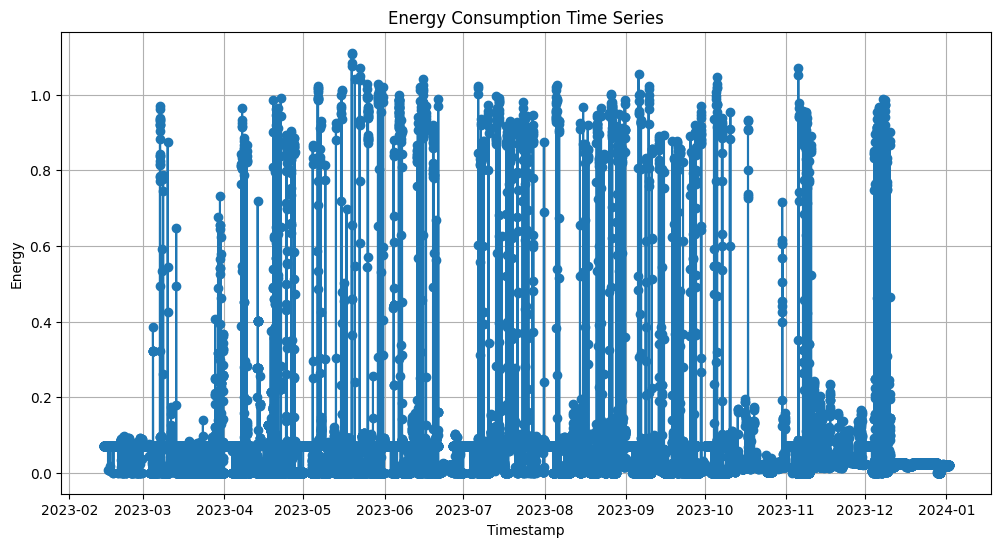

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(new_df.index, new_df['Energy'], marker='o', linestyle='-')
plt.title('Energy Consumption Time Series')
plt.xlabel('Timestamp')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

In [42]:
result = adfuller(new_df['Energy'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -25.261282522186132
p-value: 0.0
Critical Values:
	1%: -3.430561796220824
	5%: -2.861633608302425
	10%: -2.566819824825796


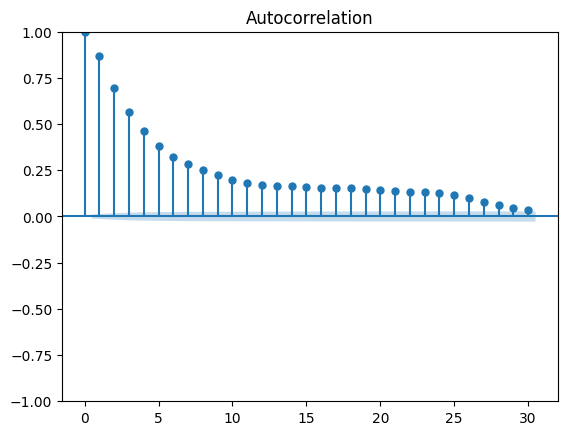

In [44]:
plot_acf(new_df['Energy'], lags=30)
plt.show()
#q=6

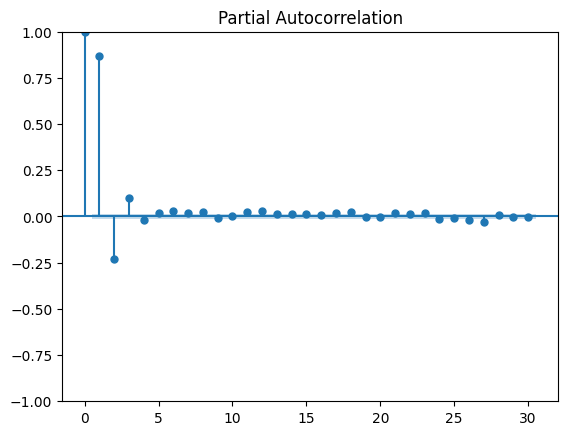

In [45]:
plot_pacf(new_df['Energy'], lags=30)
plt.show()
#p=3

In [46]:
train_size = int(len(new_df) * 0.8)
train, test = new_df[:train_size], new_df[train_size:]

In [61]:
order = (3, 0, 6)  # order (p, d, q)
model = ARIMA(train['Energy'], order=order)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


In [62]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Energy   No. Observations:                24729
Model:                 ARIMA(3, 0, 6)   Log Likelihood               28665.818
Date:                Thu, 02 May 2024   AIC                         -57309.637
Time:                        19:18:27   BIC                         -57220.364
Sample:                    02-14-2023   HQIC                        -57280.727
                         - 10-29-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0744      0.008      8.921      0.000       0.058       0.091
ar.L1          1.4467      0.240      6.026      0.000       0.976       1.917
ar.L2         -0.5312      0.369     -1.438      0.150      -1.255       0.193
ar.L3          0.0409      0.138      0.297      0.767      -0.229       0.311
ma.L1         -0.3681      0.240     -1.533      0.125      -0.839       0.102
ma.L2         -0.1998      0.114     -1.752      0.080      -0.423       0.024
ma.L3         -0.0040      0.063     -0.063      0.949      -0.128       0.120
ma.L4         -0.0196      0.005     -4.166      0.000      -0.029      -0.010
ma.L5         -0.0513      0.004    -12.344      0.000      -0.059      -0.043
ma.L6         -0.0203      0.011     -1.779      0.075      -0.043       0.002
sigma2         0.0058   1.76e-05    326.949      0.000       0.006       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           2701989.27
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             1.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        54.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
forecast_values = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

In [64]:
forecast_values

2023-10-29 14:15:00    0.025029
2023-10-29 14:30:00    0.033008
2023-10-29 14:45:00    0.039119
2023-10-29 15:00:00    0.044005
2023-10-29 15:15:00    0.048006
                         ...   
2024-01-01 22:45:00    0.074439
2024-01-01 23:00:00    0.074439
2024-01-01 23:15:00    0.074439
2024-01-01 23:30:00    0.074439
2024-01-01 23:45:00    0.074439
Freq: 15T, Name: predicted_mean, Length: 6183, dtype: float64

In [65]:
rmse = np.sqrt(mean_squared_error(test['Energy'], forecast_values))
print('Test RMSE:', rmse)

Test RMSE: 0.12720042262182438
